# JupyterLite で学ぶ scikit-learn 初級チュートリアル

このノートブックは、**JupyterLite（ブラウザだけで動く Jupyter 環境）** 上で、
Python の機械学習ライブラリ **scikit-learn** の基礎を一から学ぶためのチュートリアルです。

## 対象者
- Python と NumPy/pandas の基本を理解している方
- 機械学習を初めて学ぶ方、または基礎を復習したい方

## このチュートリアルで学ぶこと
1. scikit-learn の概要と基本的な使い方
2. データの前処理
3. 線形回帰
4. ロジスティック回帰（分類）
5. 決定木
6. モデルの評価
7. 交差検証

## 0. 環境準備（JupyterLite 用）

まず、必要なライブラリをインストールします。

In [1]:
# JupyterLite 用のパッケージインストール
try:
    import piplite
    await piplite.install(['numpy', 'pandas', 'matplotlib', 'scikit-learn'])
except ImportError:
    pass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
print(f'scikit-learn バージョン: {sklearn.__version__}')

# 警告を抑制
import warnings
warnings.filterwarnings('ignore')

# 乱数シード
np.random.seed(42)

scikit-learn バージョン: 1.7.2


---
## 1. scikit-learn の概要と基本的な使い方

### 1.1 scikit-learn の特徴

- **一貫したAPI**: すべてのモデルが同じインターフェースを持つ
  - `fit()`: モデルの学習
  - `predict()`: 予測
  - `score()`: 評価
- **豊富なアルゴリズム**: 回帰、分類、クラスタリング、次元削減など
- **前処理ツール**: スケーリング、エンコーディング、欠損値処理
- **モデル評価**: 交差検証、グリッドサーチなど

### 1.2 サンプルデータセット

In [2]:
from sklearn.datasets import load_iris, load_wine, load_diabetes

# iris データセット（分類用）
iris = load_iris()
print('=== Iris Dataset ===')
print(f'特徴量: {iris.feature_names}')
print(f'クラス: {iris.target_names}')
print(f'データ形状: {iris.data.shape}')

=== Iris Dataset ===
特徴量: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
クラス: ['setosa' 'versicolor' 'virginica']
データ形状: (150, 4)


In [3]:
# DataFrameに変換
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['species'] = df_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [4]:
# diabetes データセット（回帰用）
diabetes = load_diabetes()
print('\n=== Diabetes Dataset ===')
print(f'特徴量: {diabetes.feature_names}')
print(f'データ形状: {diabetes.data.shape}')
print(f'ターゲット形状: {diabetes.target.shape}')


=== Diabetes Dataset ===
特徴量: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
データ形状: (442, 10)
ターゲット形状: (442,)


### 1.3 基本的なワークフロー

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. データの分割
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'訓練データ: {X_train.shape}')
print(f'テストデータ: {X_test.shape}')

訓練データ: (105, 4)
テストデータ: (45, 4)


In [6]:
# 2. モデルの作成と学習
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print('モデル学習完了')

モデル学習完了


In [7]:
# 3. 予測
y_pred = model.predict(X_test)
print(f'予測結果（先頭10件）: {y_pred[:10]}')
print(f'正解ラベル（先頭10件）: {y_test[:10]}')

予測結果（先頭10件）: [1 0 2 1 1 0 1 2 1 1]
正解ラベル（先頭10件）: [1 0 2 1 1 0 1 2 1 1]


In [8]:
# 4. 評価
accuracy = accuracy_score(y_test, y_pred)
print(f'正解率: {accuracy:.4f}')

# score メソッドでも同じ結果
print(f'score: {model.score(X_test, y_test):.4f}')

正解率: 1.0000
score: 1.0000


---
## 2. データの前処理

### 2.1 特徴量のスケーリング

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# サンプルデータ
X = np.array([[1, 100],
              [2, 200],
              [3, 300],
              [4, 400],
              [5, 500]])

print('元のデータ:')
print(X)

元のデータ:
[[  1 100]
 [  2 200]
 [  3 300]
 [  4 400]
 [  5 500]]


In [10]:
# 標準化（平均0、標準偏差1）
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

print('標準化後:')
print(X_standard)
print(f'平均: {X_standard.mean(axis=0)}')
print(f'標準偏差: {X_standard.std(axis=0)}')

標準化後:
[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
平均: [0. 0.]
標準偏差: [1. 1.]


In [11]:
# Min-Max スケーリング（0-1の範囲）
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

print('Min-Max スケーリング後:')
print(X_minmax)
print(f'最小値: {X_minmax.min(axis=0)}')
print(f'最大値: {X_minmax.max(axis=0)}')

Min-Max スケーリング後:
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [0.75 0.75]
 [1.   1.  ]]
最小値: [0. 0.]
最大値: [1. 1.]


### 2.2 カテゴリ変数のエンコーディング

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# サンプルデータ
colors = ['red', 'blue', 'green', 'red', 'blue']

# ラベルエンコーディング
label_encoder = LabelEncoder()
colors_encoded = label_encoder.fit_transform(colors)

print('ラベルエンコーディング:')
print(f'元: {colors}')
print(f'変換後: {colors_encoded}')
print(f'クラス: {label_encoder.classes_}')

ラベルエンコーディング:
元: ['red', 'blue', 'green', 'red', 'blue']
変換後: [2 0 1 2 0]
クラス: ['blue' 'green' 'red']


In [13]:
# One-Hot エンコーディング
onehot_encoder = OneHotEncoder(sparse_output=False)
colors_onehot = onehot_encoder.fit_transform(np.array(colors).reshape(-1, 1))

print('One-Hot エンコーディング:')
print(colors_onehot)
print(f'カテゴリ: {onehot_encoder.categories_}')

One-Hot エンコーディング:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
カテゴリ: [array(['blue', 'green', 'red'], dtype='<U5')]


### 2.3 欠損値の処理

In [14]:
from sklearn.impute import SimpleImputer

# 欠損値を含むデータ
X_missing = np.array([[1, 2, np.nan],
                      [3, np.nan, 6],
                      [7, 8, 9],
                      [np.nan, 11, 12]])

print('欠損値を含むデータ:')
print(X_missing)

欠損値を含むデータ:
[[ 1.  2. nan]
 [ 3. nan  6.]
 [ 7.  8.  9.]
 [nan 11. 12.]]


In [15]:
# 平均値で補完
imputer_mean = SimpleImputer(strategy='mean')
X_imputed_mean = imputer_mean.fit_transform(X_missing)

print('平均値で補完:')
print(X_imputed_mean)

平均値で補完:
[[ 1.          2.          9.        ]
 [ 3.          7.          6.        ]
 [ 7.          8.          9.        ]
 [ 3.66666667 11.         12.        ]]


In [16]:
# 中央値で補完
imputer_median = SimpleImputer(strategy='median')
X_imputed_median = imputer_median.fit_transform(X_missing)

print('中央値で補完:')
print(X_imputed_median)

中央値で補完:
[[ 1.  2.  9.]
 [ 3.  8.  6.]
 [ 7.  8.  9.]
 [ 3. 11. 12.]]


### 📝 2章 練習問題

iris データセットの特徴量を標準化し、訓練データとテストデータに分割してください。

In [17]:
# 練習問題の解答欄



---
## 3. 線形回帰

### 3.1 単回帰

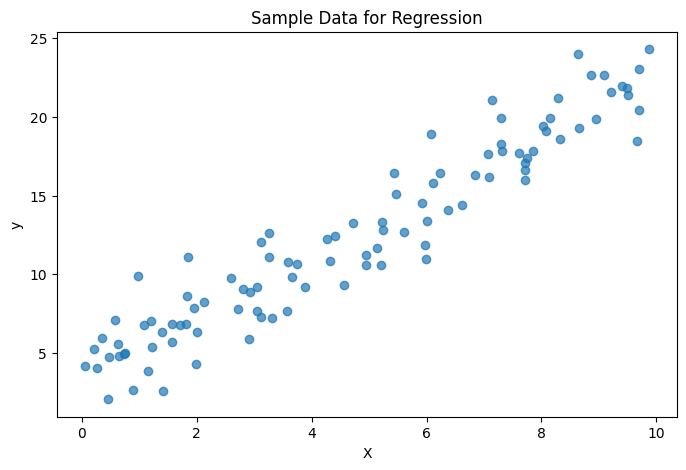

In [18]:
from sklearn.linear_model import LinearRegression

# サンプルデータの作成
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.flatten() + 3 + np.random.randn(100) * 2

# 可視化
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sample Data for Regression')
plt.show()

In [19]:
# モデルの学習
model = LinearRegression()
model.fit(X, y)

print(f'切片 (intercept): {model.intercept_:.4f}')
print(f'係数 (coefficient): {model.coef_[0]:.4f}')

切片 (intercept): 3.4302
係数 (coefficient): 1.9080


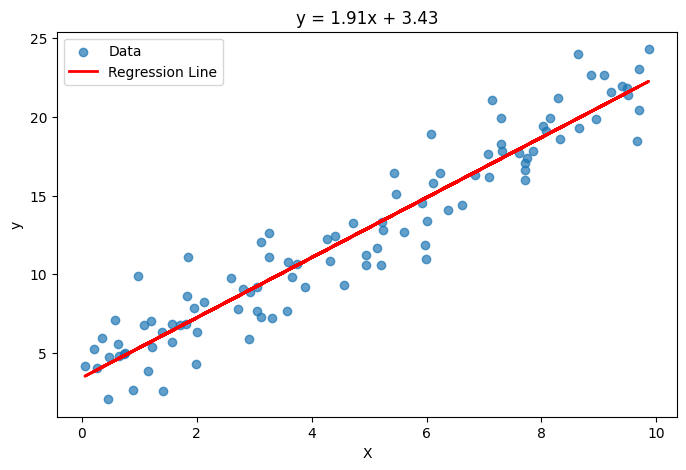

In [20]:
# 回帰直線の可視化
y_pred = model.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.7, label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')
plt.legend()
plt.show()

### 3.2 重回帰

In [21]:
# diabetes データセットを使用
X = diabetes.data
y = diabetes.target

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# モデルの学習
model = LinearRegression()
model.fit(X_train, y_train)

# 係数の確認
print('各特徴量の係数:')
for name, coef in zip(diabetes.feature_names, model.coef_):
    print(f'  {name}: {coef:.2f}')

各特徴量の係数:
  age: 29.25
  sex: -261.71
  bmi: 546.30
  bp: 388.40
  s1: -901.96
  s2: 506.76
  s3: 121.15
  s4: 288.04
  s5: 659.27
  s6: 41.38


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# 予測と評価
y_pred = model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.4f}')

MSE: 2821.75
RMSE: 53.12
R²: 0.4773


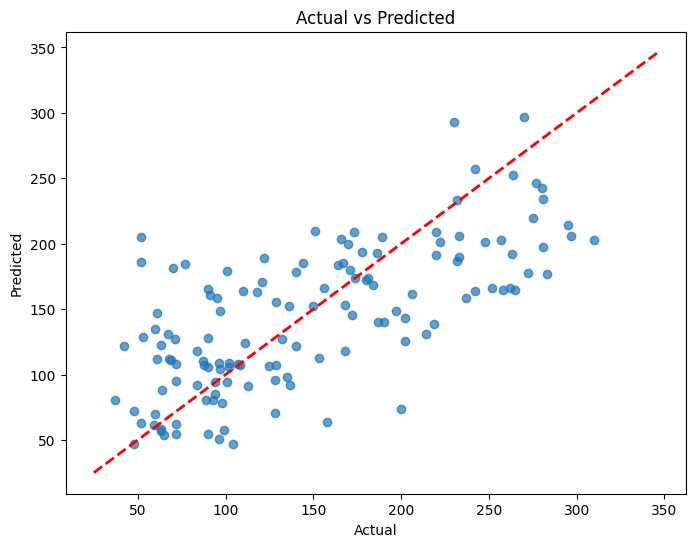

In [23]:
# 予測値 vs 実測値のプロット
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

---
## 4. ロジスティック回帰（分類）

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# iris データセット（2クラスに限定）
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# モデルの学習
model = LogisticRegression()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

print('=== 分類結果 ===')
print(f'正解率: {accuracy_score(y_test, y_pred):.4f}')

=== 分類結果 ===
正解率: 1.0000


混同行列:
[[17  0]
 [ 0 13]]


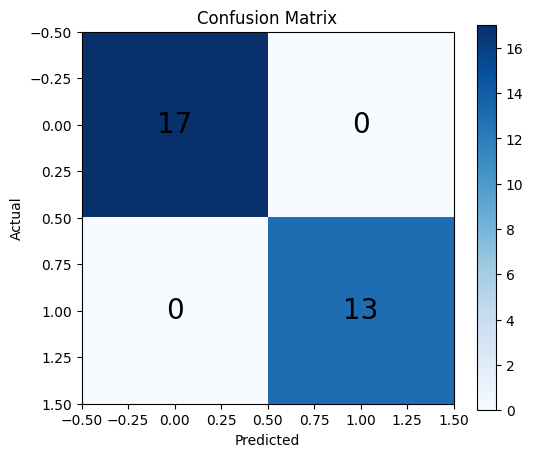

In [26]:
# 混同行列
cm = confusion_matrix(y_test, y_pred)
print('混同行列:')
print(cm)

# 可視化
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=20)
plt.show()

In [27]:
# 分類レポート
print('分類レポート:')
print(classification_report(y_test, y_pred, target_names=['setosa', 'versicolor']))

分類レポート:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
# 確率の予測
y_prob = model.predict_proba(X_test)
print('予測確率（先頭5件）:')
print(y_prob[:5])

予測確率（先頭5件）:
[[0.00138809 0.99861191]
 [0.01727551 0.98272449]
 [0.00347239 0.99652761]
 [0.96617439 0.03382561]
 [0.93735729 0.06264271]]


### 4.2 多クラス分類

In [29]:
# 全クラスを使用
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 多クラス分類
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'正解率: {accuracy_score(y_test, y_pred):.4f}')
print('\n分類レポート:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

正解率: 1.0000

分類レポート:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



---
## 5. 決定木

### 5.1 決定木分類器

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# データ準備
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# モデルの学習
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# 評価
y_pred = tree_model.predict(X_test)
print(f'正解率: {accuracy_score(y_test, y_pred):.4f}')

正解率: 1.0000


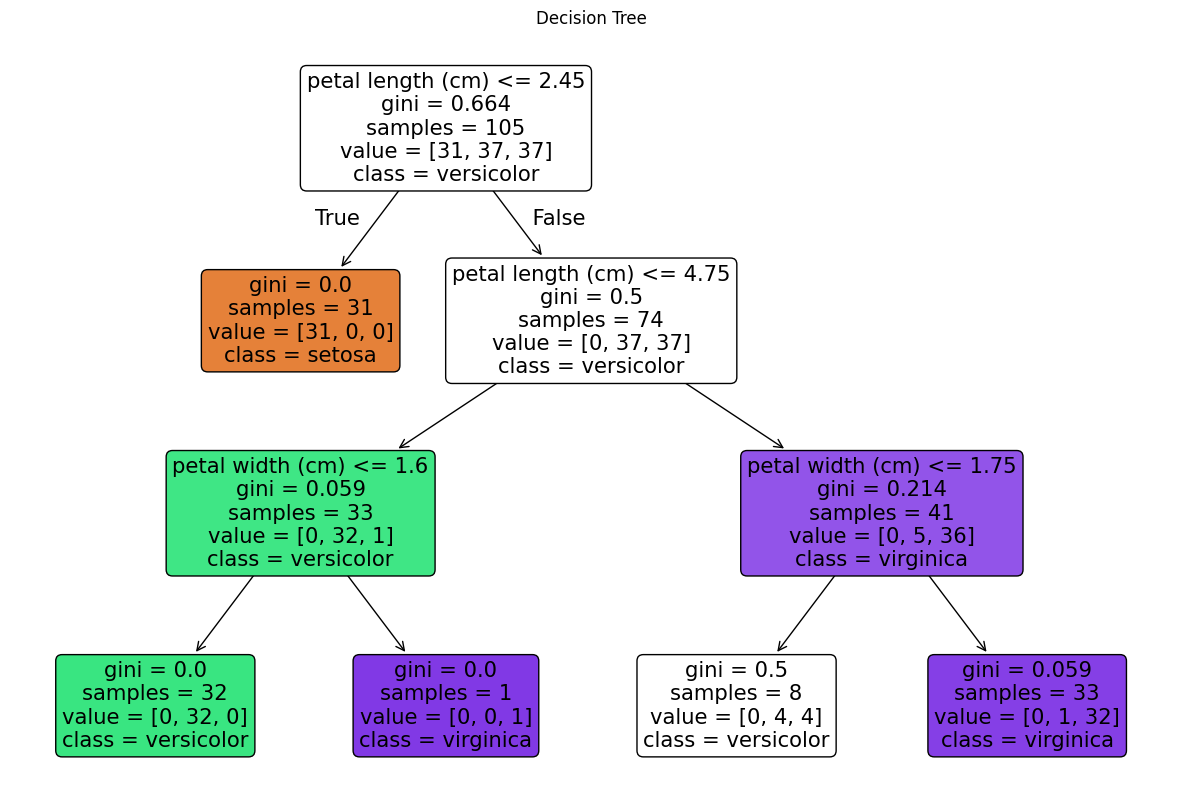

In [31]:
# 決定木の可視化
plt.figure(figsize=(15, 10))
plot_tree(tree_model, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title('Decision Tree')
plt.show()

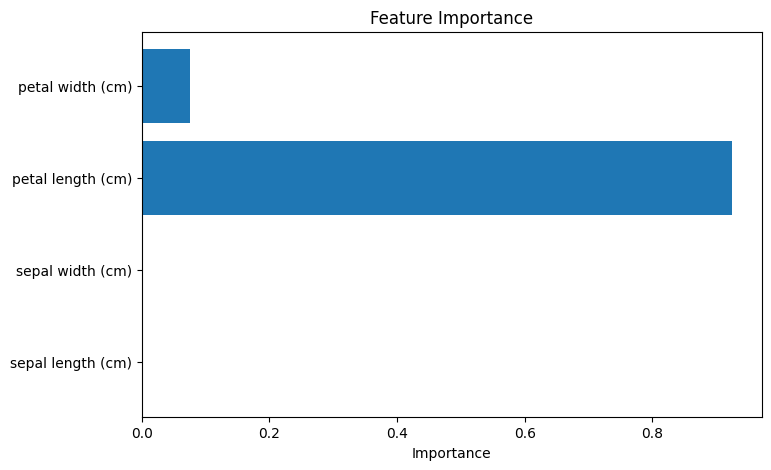

In [32]:
# 特徴量の重要度
importance = tree_model.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(iris.feature_names, importance)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

### 5.2 決定木回帰

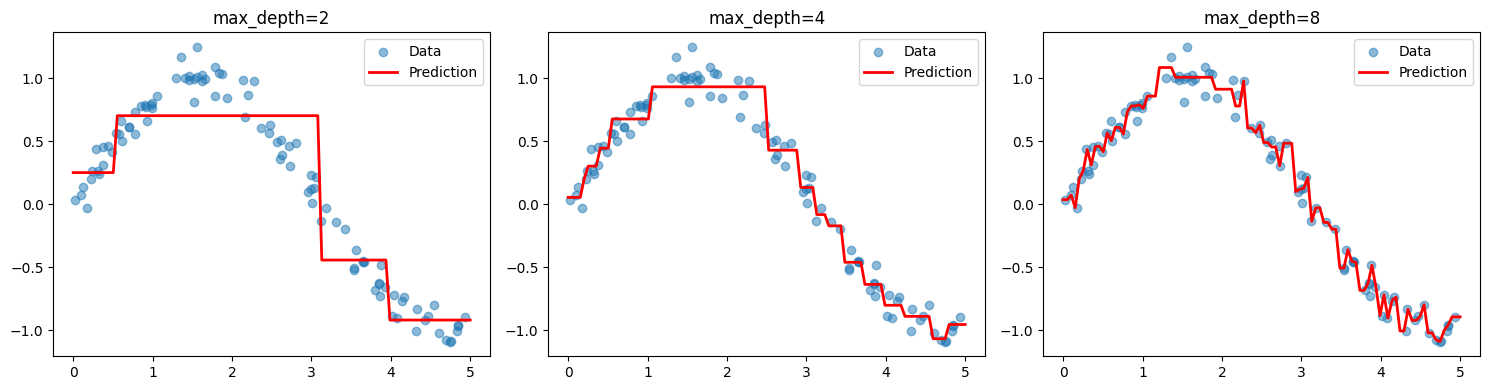

In [33]:
from sklearn.tree import DecisionTreeRegressor

# サンプルデータ
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.1

# 異なる深さのモデル
depths = [2, 4, 8]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, depth in zip(axes, depths):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X, y)
    
    X_test = np.linspace(0, 5, 100).reshape(-1, 1)
    y_pred = model.predict(X_test)
    
    ax.scatter(X, y, alpha=0.5, label='Data')
    ax.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
    ax.set_title(f'max_depth={depth}')
    ax.legend()

plt.tight_layout()
plt.show()

---
## 6. モデルの評価

### 6.1 分類モデルの評価指標

In [34]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, roc_curve
)

# 2クラス分類の例
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print('=== 分類評価指標 ===')
print(f'Accuracy:  {accuracy_score(y_test, y_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_pred):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred):.4f}')
print(f'F1 Score:  {f1_score(y_test, y_pred):.4f}')
print(f'AUC:       {roc_auc_score(y_test, y_prob):.4f}')

=== 分類評価指標 ===
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
AUC:       1.0000


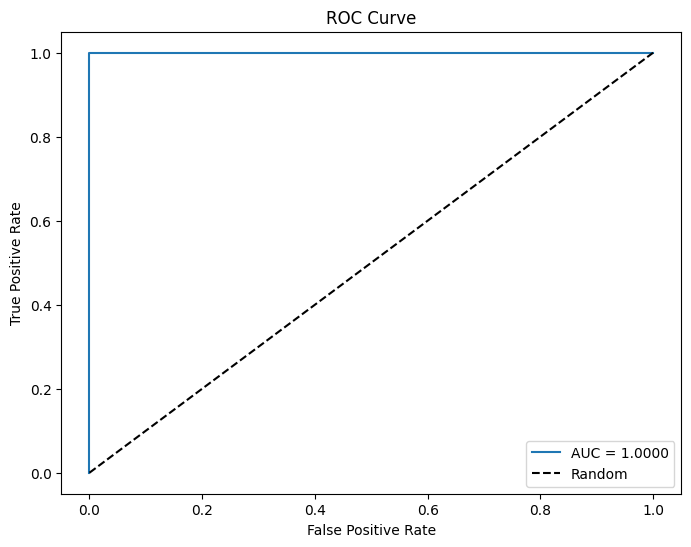

In [35]:
# ROC曲線
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 6.2 回帰モデルの評価指標

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# diabetes データセット
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('=== 回帰評価指標 ===')
print(f'MAE:  {mean_absolute_error(y_test, y_pred):.4f}')
print(f'MSE:  {mean_squared_error(y_test, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')
print(f'R²:   {r2_score(y_test, y_pred):.4f}')

=== 回帰評価指標 ===
MAE:  41.9194
MSE:  2821.7510
RMSE: 53.1202
R²:   0.4773


---
## 7. 交差検証

In [37]:
from sklearn.model_selection import cross_val_score, KFold

# iris データセット
X = iris.data
y = iris.target

# モデル
model = LogisticRegression(max_iter=200)

# 5分割交差検証
scores = cross_val_score(model, X, y, cv=5)

print('交差検証スコア:')
print(f'各フォールドのスコア: {scores}')
print(f'平均スコア: {scores.mean():.4f}')
print(f'標準偏差: {scores.std():.4f}')

交差検証スコア:
各フォールドのスコア: [0.96666667 1.         0.93333333 0.96666667 1.        ]
平均スコア: 0.9733
標準偏差: 0.0249


In [38]:
# KFold を明示的に使用
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kfold)

print('シャッフル付き交差検証:')
print(f'平均スコア: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})')

シャッフル付き交差検証:
平均スコア: 0.9733 (+/- 0.0499)


In [39]:
# 異なる評価指標での交差検証
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
results = cross_validate(model, X, y, cv=5, scoring=scoring)

print('複数指標での交差検証:')
for metric in scoring:
    scores = results[f'test_{metric}']
    print(f'{metric}: {scores.mean():.4f} (+/- {scores.std():.4f})')

複数指標での交差検証:
accuracy: 0.9733 (+/- 0.0249)
precision_macro: 0.9768 (+/- 0.0211)
recall_macro: 0.9733 (+/- 0.0249)
f1_macro: 0.9732 (+/- 0.0252)


### 📝 7章 練習問題

wine データセットを使って以下を実行してください。

1. 決定木分類器を学習させる（max_depth=5）
2. 5分割交差検証でモデルを評価する
3. 特徴量の重要度を棒グラフで可視化する

In [40]:
# 練習問題の解答欄



---
## まとめ

このチュートリアルで学んだことをまとめます：

| トピック | 主なクラス・関数 |
|---------|---------------|
| 前処理 | `StandardScaler`, `MinMaxScaler`, `LabelEncoder`, `SimpleImputer` |
| 線形回帰 | `LinearRegression` |
| 分類 | `LogisticRegression`, `DecisionTreeClassifier` |
| 評価（分類） | `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `roc_auc_score` |
| 評価（回帰） | `mean_squared_error`, `mean_absolute_error`, `r2_score` |
| 交差検証 | `cross_val_score`, `cross_validate`, `KFold` |

## 次のステップ

初級を終えたら、**scikit-learn 中級チュートリアル** で以下を学びましょう：
- アンサンブル学習（ランダムフォレスト、勾配ブースティング）
- サポートベクターマシン
- ハイパーパラメータチューニング（GridSearchCV）
- パイプラインの構築
- 特徴量エンジニアリング

---
## 総合演習

これまで学んだ内容を使って、以下の課題に挑戦してください。

### 課題：ワインの品質分類

wine データセットを使用して、以下のタスクを実行しなさい：

1. **データの準備**
   - wine データセットを読み込む
   - 訓練データ（70%）とテストデータ（30%）に分割
   - 特徴量を標準化

2. **複数モデルの比較**
   - ロジスティック回帰と決定木の2つのモデルを学習
   - 両方のモデルで予測を行う

3. **評価と比較**
   - 各モデルの正解率、適合率、再現率、F1スコアを計算
   - 混同行列を可視化
   - どちらのモデルが優れているか考察

4. **交差検証**
   - 5分割交差検証で両モデルを評価
   - 結果を比較

In [41]:
# 総合演習の解答欄

